<a href="https://colab.research.google.com/github/Pradeep23-01/General-CNN-models/blob/main/Genre_pred_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator 

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train=pd.read_csv('train.csv').iloc[0:100]

In [ ]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
train_image=[]
from keras.preprocessing import image
from tqdm import tqdm
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/drive/My Drive/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 100/100 [01:14<00:00,  1.33it/s]


In [ ]:
y=np.array(train.drop(['Id','Genre'],axis=1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 90 samples, validate on 10 samples
Epoch 1/10
90/90 [==============================] - 32s 359ms/step - loss: 0.7518 - accuracy: 0.5458 - val_loss: 0.6518 - val_accuracy: 0.8760
Epoch 2/10
90/90 [==============================] - 27s 299ms/step - loss: 0.6186 - accuracy: 0.6831 - val_loss: 0.6735 - val_accuracy: 0.8720
Epoch 3/10
90/90 [==============================] - 27s 297ms/step - loss: 0.6090 - accuracy: 0.7071 - val_loss: 0.6182 - val_accuracy: 0.8760
Epoch 4/10
90/90 [==============================] - 27s 298ms/step - loss: 0.5623 - accuracy: 0.7369 - val_loss: 0.5845 - val_accuracy: 0.9120
Epoch 5/10
90/90 [==============================] - 27s 298ms/step - loss: 0.5258 - accuracy: 0.7440 - val_loss: 0.6134 - val_accuracy: 0.9120
Epoch 6/10
90/90 [==============================] - 27s 298ms/step - loss: 0.5186 - accuracy: 0.7596 - val_loss: 0.5993 - val_accuracy: 0.9120
Epoch 7/10
90/90 [==============================] - 27s 297ms/step - loss: 0.5017 - accuracy: 0.76

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_image=image.load_img( '/content/GOT.jpg',
        target_size=(400,400,3))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)

In [ ]:
img = image.load_img('GOT.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255

Drama (0.505)
Romance (0.476)
Sci-Fi (0.468)


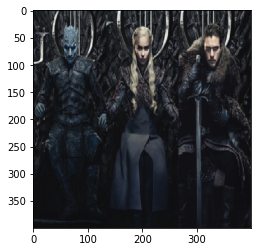

In [ ]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)